# Homework 8

#### Fill out the following information (each category below should be on a separate line): 
Name:   Summer  
Date Submitted: March 2nd, 2017

#### Use the following data set to answer the questions for your homework:

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# run plots in the notebook
%matplotlib inline

url = "http://pbpython.com/extras/sample-salesv2.csv"

sales = pd.read_csv(url)

#### changing column names

In [5]:
sales.columns = ['acct_num', 'name', 'sku', 'category', 'quantity', 'unit_price', 'ext_price', 'date']

In [6]:
sales.head()

,acct_num,name,sku,category,quantity,unit_price,ext_price,date
0,296809,Carroll PLC,QN-82852,Belt,13,44.48,578.24,2014-09-27 07:13:03
1,98022,Heidenreich-Bosco,MJ-21460,Shoes,19,53.62,1018.78,2014-07-29 02:10:44
2,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,12,24.16,289.92,2014-03-01 10:51:24
3,93356,Waters-Walker,AS-93055,Shirt,5,82.68,413.40,2013-11-17 20:41:11
4,659366,Waelchi-Fahey,AS-93055,Shirt,18,99.64,1793.52,2014-01-03 08:14:27


#### Subset the dataframe to contain only the name, category, quantity and unit price columns

In [7]:
subset_df = sales[['name', 'category', 'quantity', 'unit_price']]

In [8]:
subset_df.head()

,name,category,quantity,unit_price
0,Carroll PLC,Belt,13,44.48
1,Heidenreich-Bosco,Shoes,19,53.62
2,"Kerluke, Reilly and Bechtelar",Shirt,12,24.16
3,Waters-Walker,Shirt,5,82.68
4,Waelchi-Fahey,Shirt,18,99.64


#### Subset the dataframe to contain only shirt sales

In [9]:
shirt_df = subset_df[subset_df['category'] == 'Shirt']

In [10]:
shirt_df.head()

,name,category,quantity,unit_price
2,"Kerluke, Reilly and Bechtelar",Shirt,12,24.16
3,Waters-Walker,Shirt,5,82.68
4,Waelchi-Fahey,Shirt,18,99.64
5,"Kerluke, Reilly and Bechtelar",Shirt,17,52.82
9,"Kerluke, Reilly and Bechtelar",Shirt,12,26.98


#### Calculate the total cost per shirt sale

In [12]:
shirt_df['total_cost'] = shirt_df.quantity * shirt_df.unit_price

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [13]:
shirt_df.head()

,name,category,quantity,unit_price,total_cost
2,"Kerluke, Reilly and Bechtelar",Shirt,12,24.16,289.92
3,Waters-Walker,Shirt,5,82.68,413.40
4,Waelchi-Fahey,Shirt,18,99.64,1793.52
5,"Kerluke, Reilly and Bechtelar",Shirt,17,52.82,897.94
9,"Kerluke, Reilly and Bechtelar",Shirt,12,26.98,323.76


#### Group the shirt sales by company name

In [21]:
grouped = shirt_df.groupby('name', as_index=False).sum()

In [22]:
grouped

,name,quantity,unit_price,total_cost
0,Berge LLC,166,1226.54,9670.24
1,Carroll PLC,257,1098.93,13717.61
2,Cole-Eichmann,236,1226.75,14528.01
3,"Davis, Kshlerin and Reilly",161,828.51,7533.03
4,"Ernser, Cruickshank and Lind",262,1500.25,16944.19
5,Gorczany-Hahn,237,1132.22,12576.83
6,Hamill-Hackett,148,1091.55,8880.04
7,Hegmann and Sons,278,1528.84,16774.47
8,Heidenreich-Bosco,92,582.24,5965.25
9,Huel-Haag,200,1146.17,11944.01


#### Pull out top 10 

In [24]:
top_sellers = grouped.sort_values(by='total_cost', ascending=False).head(10)

In [25]:
top_sellers

,name,quantity,unit_price,total_cost
11,"Kihn, McClure and Denesik",288,1653.58,18956.35
19,Waters-Walker,288,1603.36,18633.71
4,"Ernser, Cruickshank and Lind",262,1500.25,16944.19
7,Hegmann and Sons,278,1528.84,16774.47
14,Kunze Inc,260,1439.92,15638.87
2,Cole-Eichmann,236,1226.75,14528.01
1,Carroll PLC,257,1098.93,13717.61
10,"Kerluke, Reilly and Bechtelar",269,1038.53,12958.23
17,"Volkman, Goyette and Lemke",220,1136.25,12791.27
5,Gorczany-Hahn,237,1132.22,12576.83


#### Graph the top 10 shirt sales

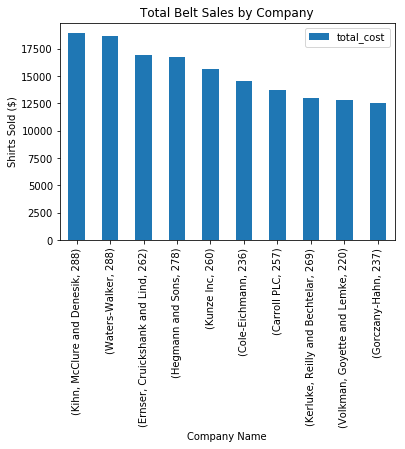

In [33]:
top_plot = top_sellers.plot(kind="bar",
                title="Total Belt Sales by Company",
                x="name",
                y="total_cost")
top_plot.set_xlabel("Company Name")
top_plot.set_ylabel("Shirts Sold ($)")


### To turn in your homework:
- Save this notebook as a PDF (or html if you can't get PDF output working)
- Upload the file to GitHub
- Provide the URL to this file on your GitHub repo in canvas 